# House Price

## import Libraries & Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('house_price.csv')
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3470,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3471,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3472,75,2,False,False,False,Parand,3.650000e+08,12166.67
3473,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [3]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475 entries, 0 to 3474
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3475 non-null   int64  
 1   Room        3475 non-null   int64  
 2   Parking     3475 non-null   bool   
 3   Warehouse   3475 non-null   bool   
 4   Elevator    3475 non-null   bool   
 5   Address     3452 non-null   object 
 6   Price       3475 non-null   float64
 7   Price(USD)  3475 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 146.1+ KB


# Expolratory Data Analysis - EDA

In [5]:
df.describe()

,Area,Room,Price,Price(USD)
count,3475.000000,3475.000000,3.475000e+03,3.475000e+03
mean,108.036835,2.079712,5.356351e+09,1.785450e+05
std,92.463177,0.758547,8.102111e+09,2.700704e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.416250e+09,4.720833e+04
50%,90.000000,2.000000,2.891700e+09,9.639000e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,3600.000000,5.000000,9.240000e+10,3.080000e+06


In [6]:
df.describe(include='object')

,Address
count,3452
unique,192
top,Punak
freq,161


In [ ]:
# sns.pairplot(df)

In [9]:
print(df['Address'].unique())

['Shahran' 'Pardis' 'Shahrake Qods' 'Shahrake Gharb'
 'North Program Organization' 'Andisheh' 'West Ferdows Boulevard' 'Narmak'
 'Saadat Abad' 'Zafar' 'Islamshahr' 'Pirouzi' 'Shahrake Shahid Bagheri'
 'Moniriyeh' 'Velenjak' 'Amirieh' 'Southern Janatabad' 'Salsabil'
 'Zargandeh' 'Feiz Garden' 'Water Organization' nan 'ShahrAra' 'Gisha'
 'Ray' 'Abbasabad' 'Ostad Moein' 'Farmanieh' 'Parand' 'Punak'
 'Qasr-od-Dasht' 'Aqdasieh' 'Pakdasht' 'Railway' 'Central Janatabad'
 'East Ferdows Boulevard' 'Pakdasht KhatunAbad' 'Sattarkhan' 'Baghestan'
 'Shahryar' 'Northern Janatabad' 'Daryan No'
 'Southern Program Organization' 'Rudhen' 'West Pars' 'Afsarieh'
 'Marzdaran' 'Dorous' 'Sadeghieh' 'Chahardangeh' 'Baqershahr' 'Jeyhoon'
 'Lavizan' 'Shams Abad' 'Fatemi' 'Keshavarz Boulevard' 'Kahrizak'
 'Qarchak' 'Northren Jamalzadeh' 'Azarbaijan' 'Bahar'
 'Persian Gulf Martyrs Lake' 'Beryanak' 'Heshmatieh' 'Elm-o-Sanat'
 'Golestan' 'Shahr-e-Ziba' 'Pasdaran' 'Chardivari' 'Gheitarieh'
 'Kamranieh' 'Gholhak' 'He

## Data cleaning

In [8]:
df.isna().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(208)

In [10]:
cleaned_df = df.drop_duplicates(keep='first')

In [11]:
cleaned_df = df.dropna()
cleaned_df = cleaned_df.drop(columns='Price')

In [12]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3452 entries, 0 to 3474
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3452 non-null   int64  
 1   Room        3452 non-null   int64  
 2   Parking     3452 non-null   bool   
 3   Warehouse   3452 non-null   bool   
 4   Elevator    3452 non-null   bool   
 5   Address     3452 non-null   object 
 6   Price(USD)  3452 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 145.0+ KB


## prepare Data

In [13]:
from sklearn.model_selection import train_test_split
x = cleaned_df.drop(columns='Price(USD)')
y = cleaned_df['Price(USD)']

x = x.to_numpy()
y = y.to_numpy()

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
print(train_x)  
print(train_y)  
print(test_x)  
print(test_y)  


In [14]:
columns = cleaned_df.drop(columns='Price(USD)').columns
train_df = pd.DataFrame(train_x, columns=columns)
test_df = pd.DataFrame(test_x, columns=columns)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

std = StandardScaler()
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [16]:

numerical = ['Area', 'Room']
categorical = ['Address']
boolian = ['Parking', 'Warehouse', 'Elevator']

num_df = train_df[numerical]
cat_df = train_df[categorical]
bool_df = train_df[boolian]

num_df = std.fit_transform(num_df)
cat_df = oe.fit_transform(cat_df)
cat_df = cat_df.reshape(-1, 1)

bool_df = bool_df.to_numpy().astype(int)
train_df = np.concatenate([cat_df, num_df, bool_df], axis=1)

In [17]:

numerical = ['Area', 'Room']
categorical = ['Address']
boolian = ['Parking', 'Warehouse', 'Elevator']

num_df = test_df[numerical]
cat_df = test_df[categorical]
bool_df = test_df[boolian]

num_df = std.transform(num_df)

cat_df = oe.transform(cat_df)
cat_df = cat_df.reshape(-1, 1)

bool_df = bool_df.to_numpy().astype(int)
test_df = np.concatenate([cat_df, num_df, bool_df], axis=1)

In [18]:
train_y.dtype

dtype('float64')

# Predict Data

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_df, train_y)

LinearRegression()

In [20]:
lr.predict(train_df)

array([  7936.12333312, -12286.37396689, 114131.38952923, ...,
       218676.61015014, 302843.75384523, 559276.89576356])

In [21]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(train_y, lr.predict(train_df))

np.float64(211814.24127414118)

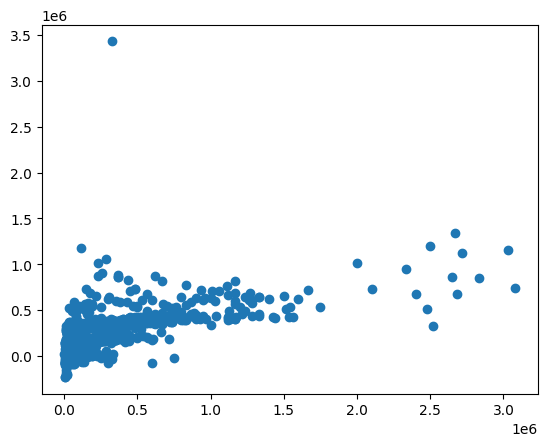

In [22]:
plt.scatter(train_y, lr.predict(train_df))

In [23]:
root_mean_squared_error(test_y, lr.predict(test_df))


np.float64(184098.74479046528)

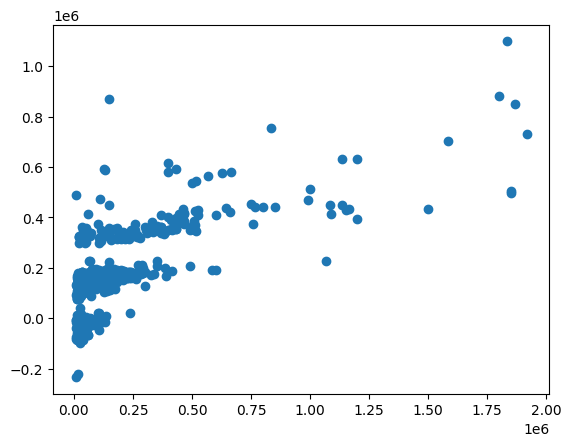

In [24]:
plt.scatter(test_y, lr.predict(test_df))


In [25]:
from sklearn.metrics import r2_score
r2_score(test_y, lr.predict(test_df))

0.4747547408168985

In [26]:
from scipy import stats
from scipy.stats import t
confidence = 0.95
se = (test_y - lr.predict(test_df)) ** 2
t.interval(0.95, len(se - 1), loc=se.mean(), scale=stats.sem(se))

(np.float64(22889824825.0663), np.float64(44894870841.78343))